In [3]:
conda install -c conda-forge/label/gcc7 missingno

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - missingno


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.3                |           py37_0         2.8 MB
    missingno-0.4.1            |             py_0          10 KB  conda-forge/label/gcc7
    ------------------------------------------------------------
                                           Total:         2.8 MB

The following NEW packages will be INSTALLED:

  missingno          conda-forge/label/gcc7/noarch::missingno-0.4.1-py_0

The following packages will be UPDATED:

  conda                                       4.7.12-py37_0 --> 4.8.3-py37_0



missingno-0.4.1      | 10 KB     | ##################################### | 100% 
conda-4.8.3          | 2.8 MB    | ##################################### | 100% 
Preparing transaction: done
Verifying

In [1]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install plotly

     |████████████████████████████████| 7.2MB 3.2MB/s eta 0:00:01     |█▋                              | 358kB 1.5MB/s eta 0:00:05
  Created wheel for retrying: filename=retrying-1.3.3-cp37-none-any.whl size=11429 sha256=40e23a3c062068c1dde227bce8bb8f44a5b925f0af5016be8e39813df0c415a5
  Stored in directory: /Users/vidhijindal/Library/Caches/pip/wheels/d7/a9/33/acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [1]:
import missingno as msno
import numpy as np
import pandas as pd
#import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

import networkx as nx

In [2]:
dataPath = './data/'

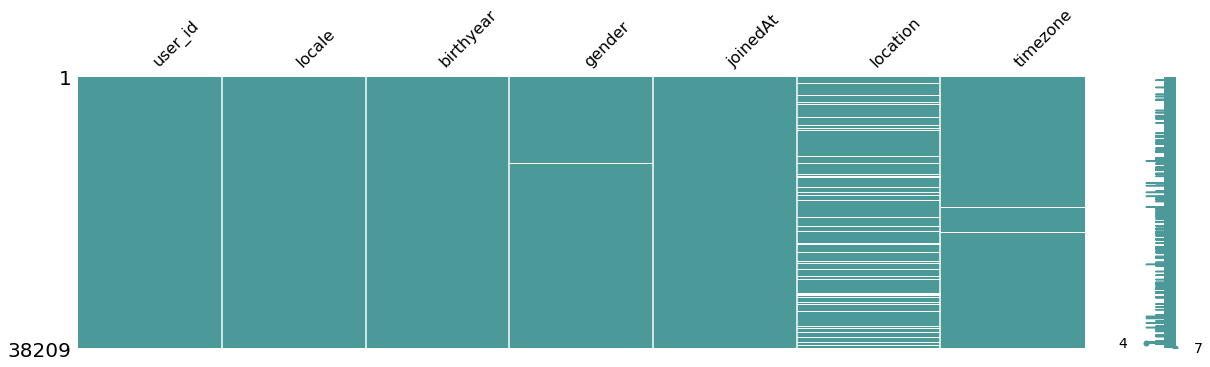

In [33]:
users = pd.read_csv(dataPath + "users.csv")
users.head()
colors = (0.3, 0.6, 0.6)
width_ratio = (15,1)
figsiz = (20,5)
msno.matrix(users, color=colors, width_ratios = width_ratio, figsize= figsiz)

In [8]:
user_friends = pd.read_csv(dataPath + "user_friends.csv")
user_friends.head()
#msno.matrix(user_friends)

,user,friends
0,3197468391,1346449342 3873244116 4226080662 1222907620 54...
1,3537982273,1491560444 395798035 2036380346 899375619 3534...
2,823183725,1484954627 1950387873 1652977611 4185960823 42...
3,1872223848,83361640 723814682 557944478 1724049724 253059...
4,3429017717,4253303705 2130310957 1838389374 3928735761 71...


(38202, 2)


KeyError: "['friends'] not found in axis"

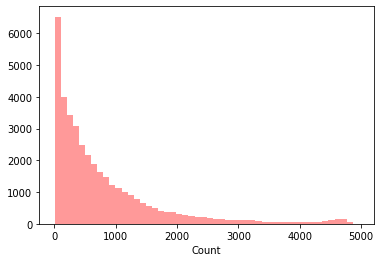

In [275]:
user_friends = pd.read_csv(dataPath + "user_friends.csv")
print(user_friends.shape)
data = np.asarray(user_friends)
count = []
#print(data[0,1])
for i in range(0,data.shape[0]):
    edges = str(data[i,1]).split(' ')
    #print(len(edges))
    count.append(len(edges))
#print(count)
user_friends['Count'] = count
datac = user_friends['Count']
sns.distplot(datac, kde=False, color="r")

user_f = user_friends
user_f.drop(['friends'])
print(user_f.columns)
#print(data[0,1])

In [222]:
user_f = user_friends
print(type(user_f))
user_f = user_f.drop('friends', axis=1)
print(user_f.columns)
user_f.describe()

<class 'pandas.core.frame.DataFrame'>
Index(['user', 'Count'], dtype='object')


,user,Count
count,3.820200e+04,38202.00000
mean,2.150974e+09,795.41757
std,1.242059e+09,922.11506
min,6.110000e+03,1.00000
25%,1.072076e+09,174.00000
50%,2.153414e+09,481.00000
75%,3.222327e+09,1058.75000
max,4.294808e+09,4964.00000


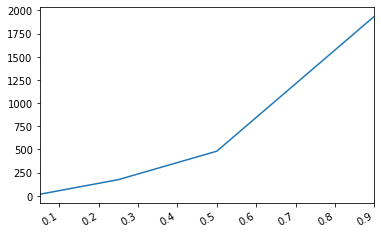

In [230]:
i = user_f['Count'].quantile([0.05, 0.25, 0.5, 0.9])
j = user_f['Count'].agg(['mean'])

pd.concat([i, j], 1)

i.T.plot(subplots=True)
plt.show()

<class 'pandas.core.series.Series'>


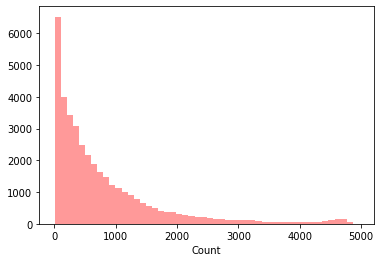

In [274]:
datac = user_f['Count']
print(type(datac))
#datac.plot.hist();
#plt.grid(True)
sns.distplot(datac, kde=False, color="r")

#datac.plot.hist(stacked=True, bins=20)
#datac.diff().hist(color='k', alpha=0.5, bins=50)
#datac['A'].diff().hist()

KeyError: 'Count'

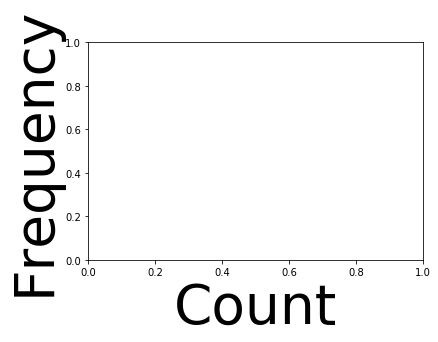

In [258]:
plt.xlabel('Count', fontsize=55)
plt.ylabel('Frequency', fontsize=55)
sns.barplot(datac['Count'])
# plt.show()
plt.tick_params(labelsize=40)
plt.tight_layout()
#plt.savefig(outputPath + 'wordBarPlot.png')

In [206]:

G=nx.DiGraph()
G.clear()
count = []
for i in range(0,50):
    val = data[i,0]
    #print(val)
    G.add_node(val)
    edges = data[i,1].split(' ')
    #print(len(edges))
    count.append(len(edges))
    
#G.clear()

In [188]:
print(G.number_of_nodes())
print(G.number_of_edges())
#print(G.nodes())
#print(G.edges())
#print(edges)

30
25


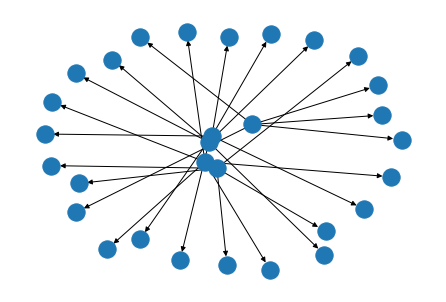

In [190]:
#nx.draw(G)
#nx.draw_graphviz(G)

#plt.show()

nx.draw(G)

In [147]:
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]
    x1, y1 = G.nodes[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = G.nodes[node]
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append('# of connections: '+str(len(adjacencies[1])))

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

ValueError: not enough values to unpack (expected 2, got 0)

In [93]:
#print(type(user_friends))
print(user_friends.shape)

for index, row in user_friends.iterrows():
    count_of_friends = len(str(row['friends']).split(' '))
    #print(row['user'], row['friends'])
    print(index, row['user'], count_of_friends)
    break

(38202, 2)
0 3197468391 3623


In [36]:
events = pd.read_csv(dataPath + 'events.csv')
events.head()

,event_id,user_id,start_time,city,state,zip,country,lat,lng,c_1,...,c_92,c_93,c_94,c_95,c_96,c_97,c_98,c_99,c_100,c_other
0,684921758,3647864012,2012-10-31T00:00:00.001Z,NaN,NaN,NaN,NaN,NaN,NaN,2,...,0,1,0,0,0,0,0,0,0,9
1,244999119,3476440521,2012-11-03T00:00:00.001Z,NaN,NaN,NaN,NaN,NaN,NaN,2,...,0,0,0,0,0,0,0,0,0,7
2,3928440935,517514445,2012-11-05T00:00:00.001Z,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,12
3,2582345152,781585781,2012-10-30T00:00:00.001Z,NaN,NaN,NaN,NaN,NaN,NaN,1,...,0,0,0,0,0,0,0,0,0,8
4,1051165850,1016098580,2012-09-27T00:00:00.001Z,NaN,NaN,NaN,NaN,NaN,NaN,1,...,0,0,0,0,0,0,0,0,0,9


In [37]:
print(events.shape)
#for row in events.columns:
#    print(row)

#### one plot that how sparse the values were about the events
subset = events.iloc[:,0:9]
for row in subset.columns:
    print(row)
    
print(subset.shape)

(3137972, 110)
event_id
user_id
start_time
city
state
zip
country
lat
lng
(3137972, 9)


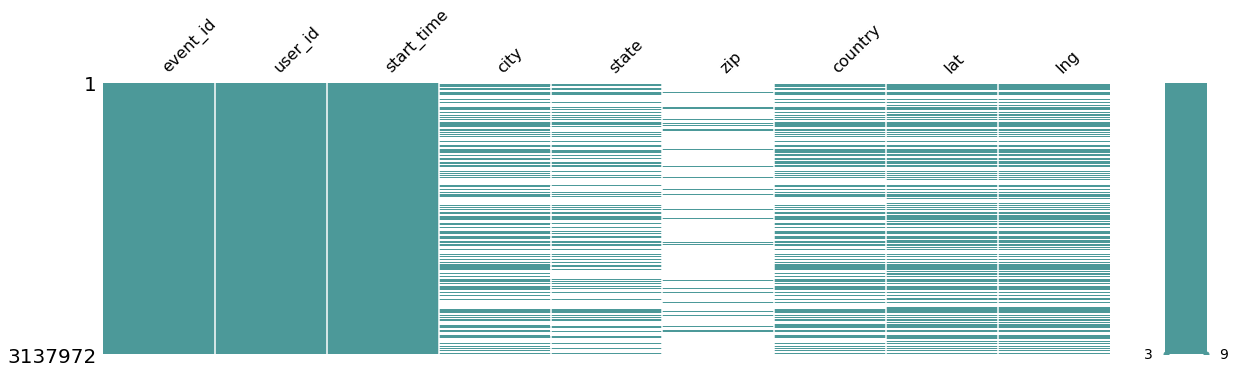

In [38]:
#print(subset.shape)
#msno.matrix(subset)
colors = (0.3, 0.6, 0.6)
width_ratio = (15,1)
figsiz = (20,5)
msno.matrix(subset, color=colors, width_ratios = width_ratio, figsize= figsiz)

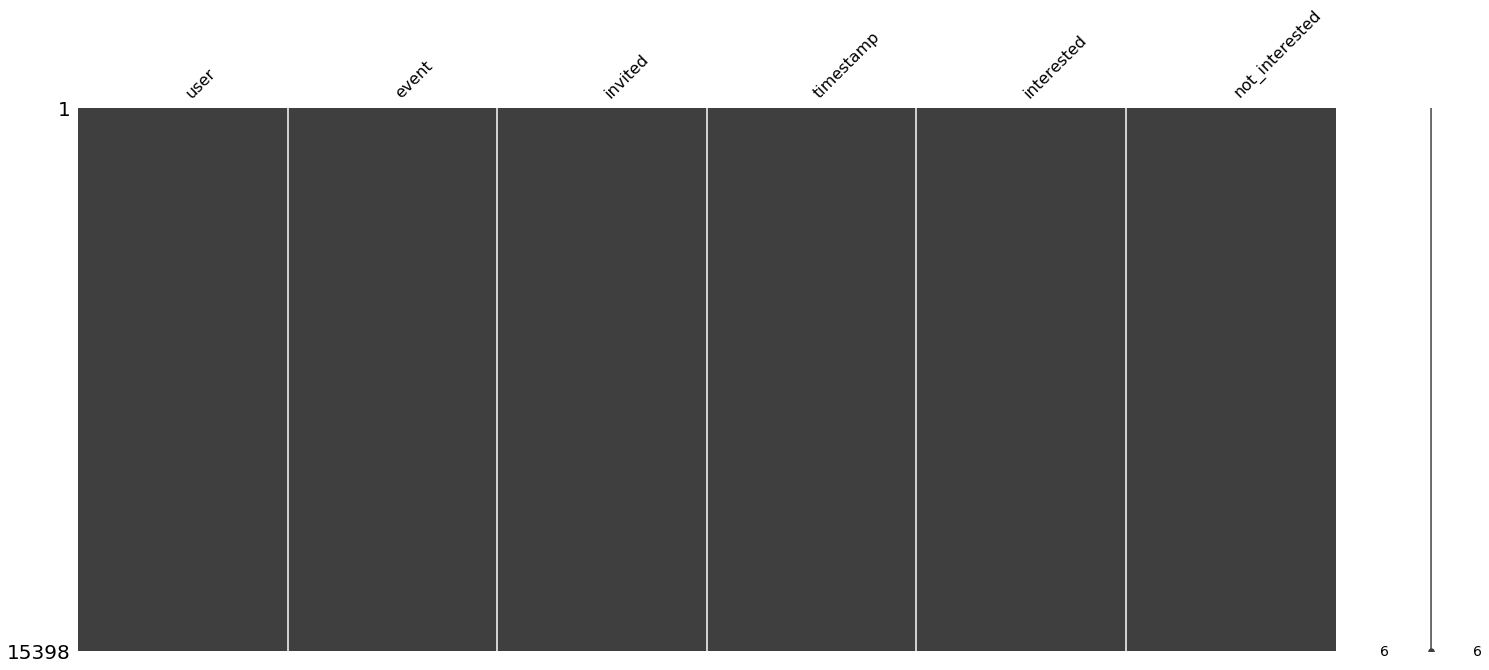

In [11]:
train_data = pd.read_csv(dataPath + 'train.csv')
train_data.head()
msno.matrix(train_data)

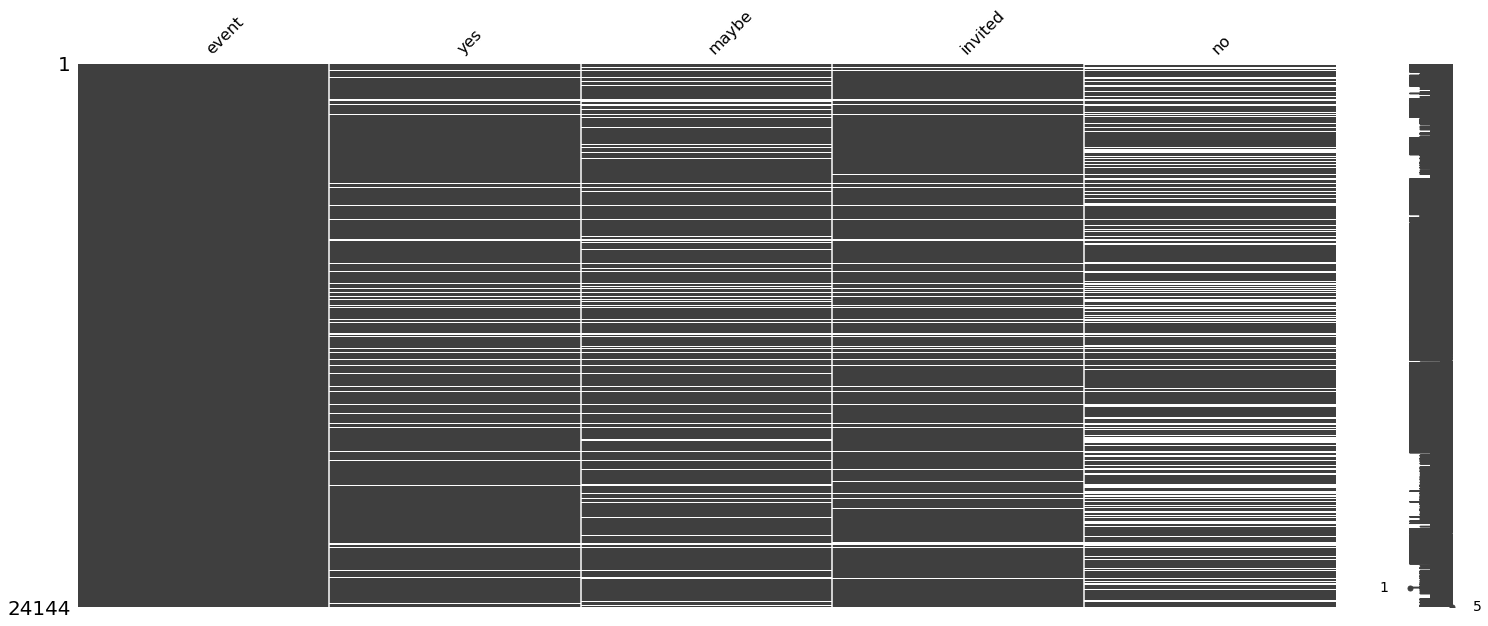

In [12]:
event_attendees_data = pd.read_csv(dataPath + 'event_attendees.csv')
event_attendees_data.head()
msno.matrix(event_attendees_data)

In [ ]:
print(event_attendees_data.shape)

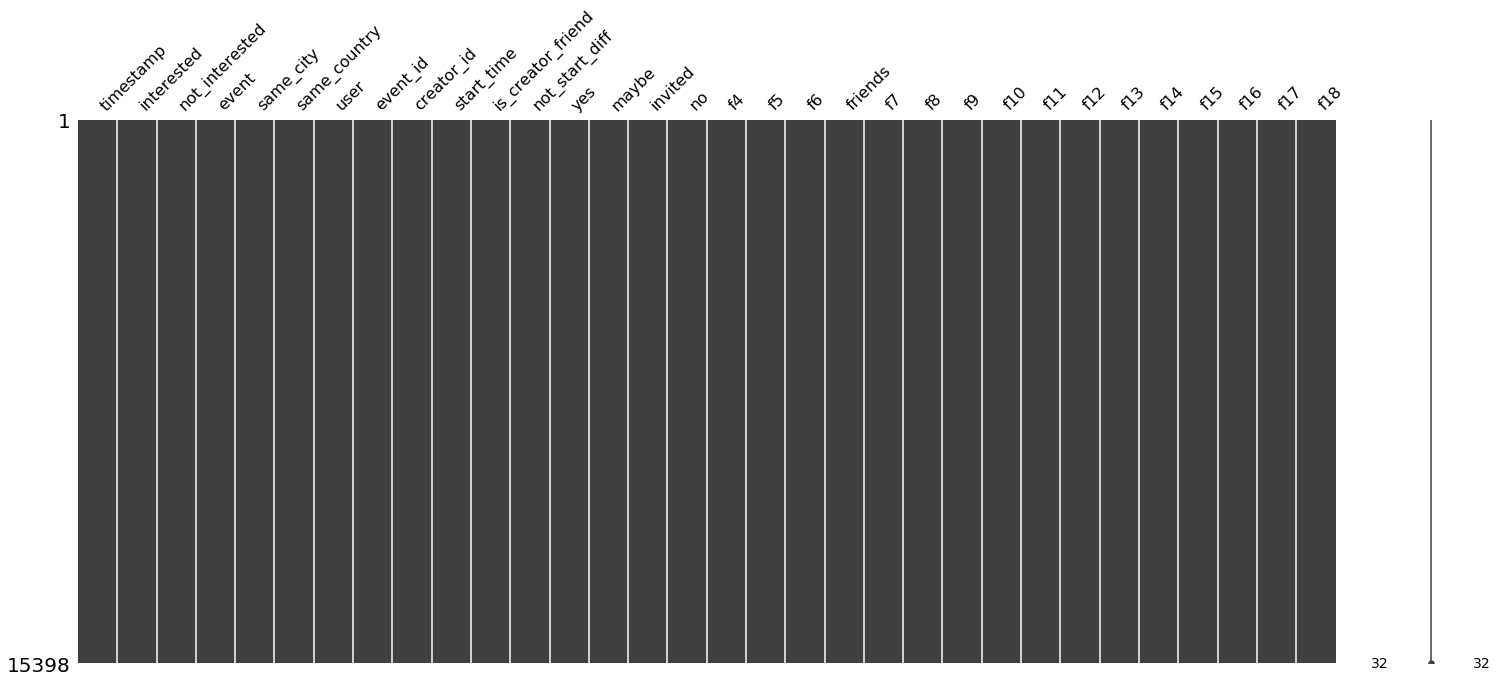

In [6]:

processed_data = pd.read_csv(dataPath + 'processed_train.csv')
processed_data.head()
msno.matrix(processed_data)

In [ ]:
###Data before cleaning
plt.figure()
plt.title("Data before cleaning")
plt.xlabel("no of features in total")
plt.ylabel("Distinct data for each feature")
plt.show()

In [ ]:
###Data after cleaning
plt.figure()
plt.title("Data before cleaning")
plt.xlabel("no of features in total")
plt.ylabel("Distinct data for each feature")
plt.show()

In [ ]:
##Extracted features
plt.figure()
plt.title("Data before cleaning")
plt.xlabel("no of features in total")
plt.ylabel("Selected features")
plt.show()

In [6]:
data = pd.read_csv(dataPath + "X_train.csv")
data.head()

,same_city,same_country,is_creator_friend,not_start_diff,yes,maybe,invited,no,f4,f5,...,f16,f17,f18,sim_yes_cluster,sim_maybe_cluster,sim_no_cluster,sim_invited_cluster,sim_friends_yes_cluster,sim_friends_maybe_cluster,sim_friends_no_cluster
0,True,True,False,-288765.0,298.0,74.0,464.0,0.0,0.000000,0.248322,...,0.0,0.000000,0.000000,187.803269,214.385683,53.446484,2.107205,53.215708,64.450644,45.122457
1,False,False,False,-64838.0,359.0,294.0,364.0,0.0,0.000000,0.818942,...,0.0,0.000123,0.000000,1.051675,12.330766,33.478060,114.483848,49.584642,54.339078,109.747899
2,False,False,False,-89923.0,84.0,85.0,7690.0,150.0,1.785714,1.011905,...,0.0,0.000886,0.019506,66.138357,14.630054,130.731693,47.167802,54.480603,32.225989,38.419102
3,False,False,False,-228132.0,429.0,559.0,6794.0,530.0,1.235431,1.303030,...,0.0,0.001763,0.078010,46.084757,123.014460,18.619169,37.170483,36.480203,40.785771,43.792400
4,True,False,False,-264882.0,12288.0,7760.0,61279.0,3588.0,0.291992,0.631510,...,0.0,0.000555,0.058552,7.250831,77.835942,32.192248,16.254584,118.394101,122.849959,85.322117


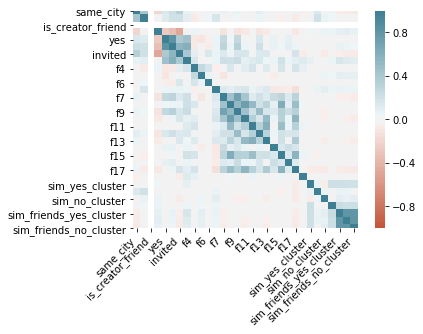

In [7]:

corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


In [37]:
model = ['Baseline','Random Forest', 'KNN', 'Gaussian NB', 'SVM', 'Neural Net', 'Logistic Regression', 'Ensemble Learning']
ftrain = [0.31416400425985086, 0.9074820972919581, 1.0,0.24730547763177324, 0.902815064815525, 0.6253826642176157, 0.19471947194719472,0.9106571498892444 ]
ftest = [0.31416400425985086, 0.5416272469252602, 0.5161854768153981, 0.27206771463119706,0.3951277480689246,  0.4554455445544554, 0.18850987432675045, 0.5642923219241444]
atrain = [0.2681818181818182, 0.9102126968663744, 1.0, 0.7157006007468745,0.9163825296314336, 0.798912161065108, 0.7352654651729177, 0.9118363370677058]
atest = [0.2681818181818182, 0.775974025974026, 0.7665584415584416, 0.7230519480519481, 0.6983766233766234,0.7321428571428571, 0.7357142857142858, 0.7818181818181819 ]

#d = {'Model': model, 'fbeta_train': ftrain, 'fbetatest': ftest}
#df = pd.DataFrame(data=d)
#print(df)

dt = pd.DataFrame()
types = ['Fbeta Score Training', 'Fbeta Score Testing']

for i in range(0,8):
    d = {'Model': model[i], 'Set':types[0], 'Score': ftrain[i]}
    temp1 = pd.DataFrame(data=d, index=[i])
    dt = pd.concat([dt, temp1])

    
for i in range(0,8):
    d = {'Model': model[i], 'Set':types[1], 'Score': ftest[i]}
    temp1 = pd.DataFrame(data=d, index=[i])
    dt = pd.concat([dt, temp1])
    
print(dt)


                 Model                   Set     Score
0             Baseline  Fbeta Score Training  0.314164
1        Random Forest  Fbeta Score Training  0.907482
2                  KNN  Fbeta Score Training  1.000000
3          Gaussian NB  Fbeta Score Training  0.247305
4                  SVM  Fbeta Score Training  0.902815
5           Neural Net  Fbeta Score Training  0.625383
6  Logistic Regression  Fbeta Score Training  0.194719
7    Ensemble Learning  Fbeta Score Training  0.910657
0             Baseline   Fbeta Score Testing  0.314164
1        Random Forest   Fbeta Score Testing  0.541627
2                  KNN   Fbeta Score Testing  0.516185
3          Gaussian NB   Fbeta Score Testing  0.272068
4                  SVM   Fbeta Score Testing  0.395128
5           Neural Net   Fbeta Score Testing  0.455446
6  Logistic Regression   Fbeta Score Testing  0.188510
7    Ensemble Learning   Fbeta Score Testing  0.564292


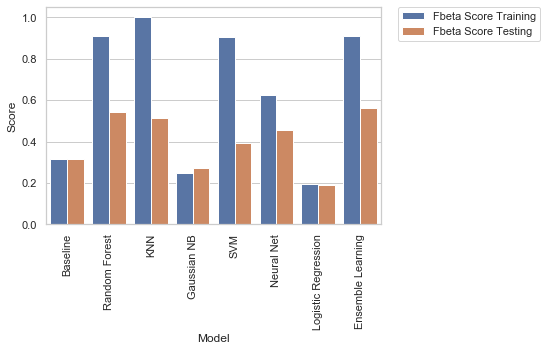

In [38]:
import seaborn as sns
sns.set(style="whitegrid")

ax = sns.barplot(x="Model", y="Score", hue="Set", data=dt)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [39]:
model = ['Baseline','Random Forest', 'KNN', 'Gaussian NB', 'SVM', 'Neural Net', 'Logistic Regression', 'Ensemble Learning']
ftrain = [0.31416400425985086, 0.9074820972919581, 1.0,0.24730547763177324, 0.902815064815525, 0.6253826642176157, 0.19471947194719472,0.9106571498892444 ]
ftest = [0.31416400425985086, 0.5416272469252602, 0.5161854768153981, 0.27206771463119706,0.3951277480689246,  0.4554455445544554, 0.18850987432675045, 0.5642923219241444]
atrain = [0.2681818181818182, 0.9102126968663744, 1.0, 0.7157006007468745,0.9163825296314336, 0.798912161065108, 0.7352654651729177, 0.9118363370677058]
atest = [0.2681818181818182, 0.775974025974026, 0.7665584415584416, 0.7230519480519481, 0.6983766233766234,0.7321428571428571, 0.7357142857142858, 0.7818181818181819 ]

#d = {'Model': model, 'fbeta_train': ftrain, 'fbetatest': ftest}
#df = pd.DataFrame(data=d)
#print(df)

dt = pd.DataFrame()
types = ['Accuracy Training', 'Accuracy Testing']

for i in range(0,8):
    d = {'Model': model[i], 'Set':types[0], 'Score': atrain[i]}
    temp1 = pd.DataFrame(data=d, index=[i])
    dt = pd.concat([dt, temp1])

    
for i in range(0,8):
    d = {'Model': model[i], 'Set':types[1], 'Score': atest[i]}
    temp1 = pd.DataFrame(data=d, index=[i])
    dt = pd.concat([dt, temp1])
    
print(dt)

                 Model                Set     Score
0             Baseline  Accuracy Training  0.268182
1        Random Forest  Accuracy Training  0.910213
2                  KNN  Accuracy Training  1.000000
3          Gaussian NB  Accuracy Training  0.715701
4                  SVM  Accuracy Training  0.916383
5           Neural Net  Accuracy Training  0.798912
6  Logistic Regression  Accuracy Training  0.735265
7    Ensemble Learning  Accuracy Training  0.911836
0             Baseline   Accuracy Testing  0.268182
1        Random Forest   Accuracy Testing  0.775974
2                  KNN   Accuracy Testing  0.766558
3          Gaussian NB   Accuracy Testing  0.723052
4                  SVM   Accuracy Testing  0.698377
5           Neural Net   Accuracy Testing  0.732143
6  Logistic Regression   Accuracy Testing  0.735714
7    Ensemble Learning   Accuracy Testing  0.781818


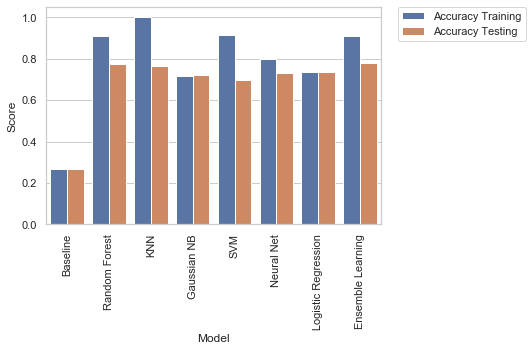

In [40]:
ax = sns.barplot(x="Model", y="Score", hue="Set", data=dt)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()